# Rede Neural para previsão de vazão de água de hidrelética

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Ecomp-Poli-UPE_logo.svg/1200px-Ecomp-Poli-UPE_logo.svg.png" alt="logo-poli-ecomp" width="500" height="250">

**Escola Politécnica de Pernambuco**

**Disciplina:** Redes Neurais

**Docente:** Meuser Valença

**Discentes:** Marcos Prudêncio, Eduardo Dubeux e Vinicyus Santos

**Recife, 2025**

## Definição do problema

## Preparação dos Dados

### Bibliotecas e Dataset

In [313]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale


In [314]:
# Lendo o dataset
df = pd.read_excel("Vazões_Diárias_1931_2016_RESUMIDA_FURNAS.xls")
df.head()

Unnamed: 0  FURNAS (6)
0         NaN         NaN
1  1/jan/1931      1996.0
2  2/jan/1931      1959.0
3  3/jan/1931      1937.0
4  4/jan/1931      1837.0

In [315]:
# Dando nome as colunas
df.columns = ["data", "vazao"]
df.head()


data   vazao
0         NaN     NaN
1  1/jan/1931  1996.0
2  2/jan/1931  1959.0
3  3/jan/1931  1937.0
4  4/jan/1931  1837.0

In [316]:
# Garantir que a coluna Data esteja no formato datetime para visualizacao
locale.setlocale(locale.LC_TIME, "pt_BR.UTF-8")

# Converter datas em formato "1/fev/1931"
df_view = df.copy()
df_view['Data'] = pd.to_datetime(df_view['data'], format="%d/%b/%Y", errors="coerce")

print(df)

              data    vazao
0              NaN      NaN
1       1/jan/1931  1996.00
2       2/jan/1931  1959.00
3       3/jan/1931  1937.00
4       4/jan/1931  1837.00
...            ...      ...
31408  27/dez/2016   548.79
31409  28/dez/2016   526.43
31410  29/dez/2016   519.20
31411  30/dez/2016   518.89
31412  31/dez/2016   498.37

[31413 rows x 2 columns]


### Análise Estatística

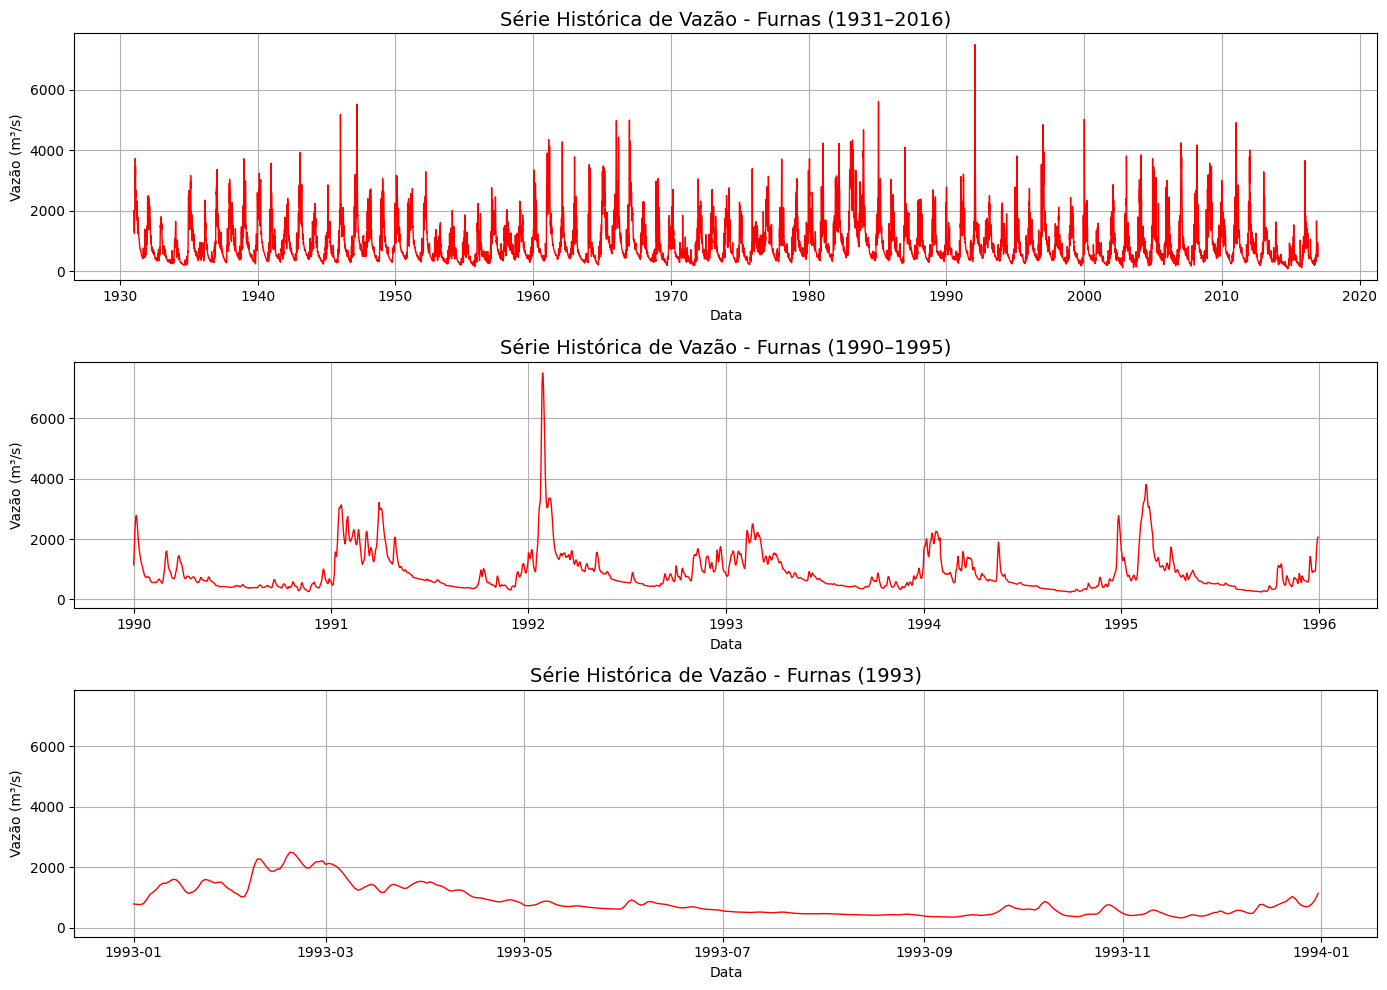

In [317]:

# Visualização geral e exemplo mais específico da série temporal
df_9095 = df_view[(df_view['Data'] >= "1990-01-01") & (df_view['Data'] <= "1995-12-31")]
df_93 = df_view[(df_view['Data'] >= "1993-01-01") & (df_view['Data'] <= "1993-12-31")]


fig, axes = plt.subplots(3, 1, figsize=(14,10), sharey=True)

axes[0].plot(df_view['Data'], df_view['vazao'], color='red', linewidth=1)
axes[0].set_title("Série Histórica de Vazão - Furnas (1931–2016)", fontsize=14)
axes[0].set_xlabel("Data")
axes[0].set_ylabel("Vazão (m³/s)")
axes[0].grid(True)

axes[1].plot(df_9095['Data'], df_9095['vazao'], color='red', linewidth=1)
axes[1].set_title("Série Histórica de Vazão - Furnas (1990–1995)", fontsize=14)
axes[1].set_xlabel("Data")
axes[1].set_ylabel("Vazão (m³/s)")
axes[1].grid(True)

axes[2].plot(df_93['Data'], df_93['vazao'], color='red', linewidth=1)
axes[2].set_title("Série Histórica de Vazão - Furnas (1993)", fontsize=14)
axes[2].set_xlabel("Data")
axes[2].set_ylabel("Vazão (m³/s)")
axes[2].grid(True)



plt.tight_layout()
plt.show()

📊 Estatísticas descritivas:
count    31412.000000
mean       906.478028
std        686.152601
min         75.000000
25%        447.705000
50%        665.000000
75%       1139.000000
max       7497.000000
Name: vazao, dtype: float64


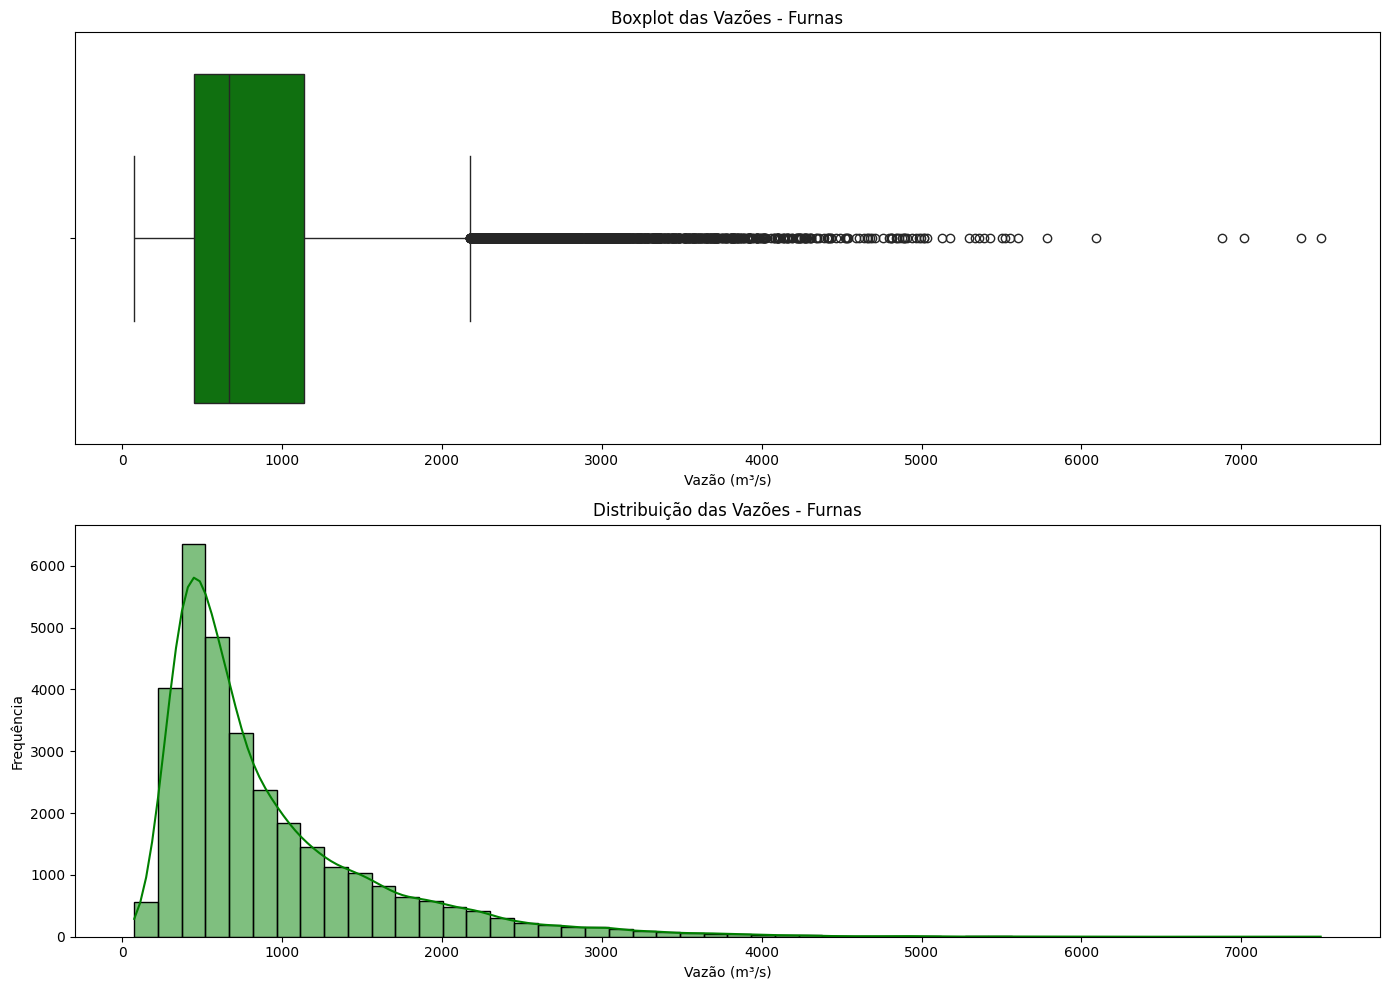

In [318]:
# Estatísticas descritivas
print("📊 Estatísticas descritivas:")
print(df['vazao'].describe())

# Boxplot + Histograma
fig, axes = plt.subplots(2, 1, figsize=(14,10))

sns.boxplot(x=df['vazao'], color="green", ax=axes[0])
axes[0].set_title("Boxplot das Vazões - Furnas")
axes[0].set_xlabel("Vazão (m³/s)")

sns.histplot(df['vazao'], bins=50, kde=True, color="green", ax=axes[1])
axes[1].set_title("Distribuição das Vazões - Furnas")
axes[1].set_xlabel("Vazão (m³/s)")
axes[1].set_ylabel("Frequência")

plt.tight_layout()
plt.show()

In [319]:
print(df)


              data    vazao
0              NaN      NaN
1       1/jan/1931  1996.00
2       2/jan/1931  1959.00
3       3/jan/1931  1937.00
4       4/jan/1931  1837.00
...            ...      ...
31408  27/dez/2016   548.79
31409  28/dez/2016   526.43
31410  29/dez/2016   519.20
31411  30/dez/2016   518.89
31412  31/dez/2016   498.37

[31413 rows x 2 columns]


### Tratamento nulos e zeros

In [320]:
# Instâncias nulas
null = df['vazao'].isna().sum()

# Instâncias iguais a zero
zero = (df['vazao'] == 0).sum()

print(f" Valores nulos: {null}")
print(f" Valores iguais a zero: {zero}")

 Valores nulos: 1
 Valores iguais a zero: 0


In [321]:
# Remover valores nulos
df = df.dropna(subset=['vazao'])

null = df['vazao'].isna().sum()

print(f" Valores nulos: {null}")

 Valores nulos: 0


In [322]:
# ordenando os valores por data e definindo ela como índice
df.set_index(keys=['data'], drop=True, inplace=True)
df.head()

vazao
data              
1/jan/1931  1996.0
2/jan/1931  1959.0
3/jan/1931  1937.0
4/jan/1931  1837.0
5/jan/1931  1713.0

In [323]:
# Normalizar dados (usando MinMaxScaler pois mantém valores entre 0 e 1, e redes neurais são mais sensíveis à escala)
# scaler = MinMaxScaler()
# df['Vazao'] = scaler.fit_transform(df[['Vazao']])

# print(df[['Vazao']].head())


In [324]:
# # Visualização série temporam com dados normalizados
# df_9095 = df[(df['Data'] >= "1990-01-01") & (df['Data'] <= "1995-12-31")]
# df_93 = df[(df['Data'] >= "1993-01-01") & (df['Data'] <= "1993-12-31")]


# fig, axes = plt.subplots(3, 1, figsize=(14,10), sharey=True)

# axes[0].plot(df['Data'], df['Vazao'], color='red', linewidth=1)
# axes[0].set_title("Série Histórica de Vazão - Furnas (1931–2016)", fontsize=14)
# axes[0].set_xlabel("Data")
# axes[0].set_ylabel("Vazão (m³/s)")
# axes[0].grid(True)

# axes[1].plot(df_9095['Data'], df_9095['Vazao'], color='red', linewidth=1)
# axes[1].set_title("Série Histórica de Vazão - Furnas (1990–1995)", fontsize=14)
# axes[1].set_xlabel("Data")
# axes[1].set_ylabel("Vazão (m³/s)")
# axes[1].grid(True)

# axes[2].plot(df_93['Data'], df_93['Vazao'], color='red', linewidth=1)
# axes[2].set_title("Série Histórica de Vazão - Furnas (1993)", fontsize=14)
# axes[2].set_xlabel("Data")
# axes[2].set_ylabel("Vazão (m³/s)")
# axes[2].grid(True)


# plt.tight_layout()
# plt.show()

## Modelagem

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop

tf.random.set_seed(42)

# Deslocamento dos dados 15 pra esq 7 pra dir é apenas no 
# 

In [326]:
def ajustar_dados(dataset : pd.DataFrame, qntd_entrada : int, qntd_saida = 7):

  # quantidade total de linhas do dataset
  qntd_valores = dataset.shape[0]

  tam_amostra = qntd_entrada + qntd_saida

  # periodo vai ser usado para dividir dataset tem treino validacao e teste (dias)
  dict_df = {'periodo' : []}

  cont_entrada = -qntd_entrada
  cont_saida = 1

  # cria as colunas corretas para dict_df, para entradas (negativo) e saídas (positivo)
  for i in range(tam_amostra):
    if cont_entrada < 0:
      dict_df.update({f'dia {cont_entrada + 1}' : []})
      cont_entrada += 1
    else:
      dict_df.update({f'dia {cont_saida}' : []})
      cont_saida += 1


  # calcula a periodo correto para cada amostra e adiciona os valores corretos de vazao para cada dia da amostra
  for i in range(tam_amostra, qntd_valores - tam_amostra):
    for j , key in enumerate(dict_df.keys()):

      if key == 'periodo':
        inicio = dataset.index[i]
        fim = dataset.index[i+tam_amostra]
        periodo = f'{inicio} - {fim}'
        dict_df.get('periodo').append(periodo)

      else:
        vazao = dataset['vazao'].iloc[i + j]
        dict_df.get(key).append(vazao)

  df = pd.DataFrame(dict_df)
  return df

In [327]:
print(df)

               vazao
data                
1/jan/1931   1996.00
2/jan/1931   1959.00
3/jan/1931   1937.00
4/jan/1931   1837.00
5/jan/1931   1713.00
...              ...
27/dez/2016   548.79
28/dez/2016   526.43
29/dez/2016   519.20
30/dez/2016   518.89
31/dez/2016   498.37

[31412 rows x 1 columns]


In [328]:
df_15 = ajustar_dados(df,15,7)
print(df_15)

                         periodo  dia -14  dia -13  ...    dia 5    dia 6    dia 7
0      23/jan/1931 - 14/fev/1931  1245.00  1326.00  ...  3135.00  3729.00  3578.00
1      24/jan/1931 - 15/fev/1931  1326.00  1316.00  ...  3729.00  3578.00  3538.00
2      25/jan/1931 - 16/fev/1931  1316.00  1354.00  ...  3578.00  3538.00  3479.00
3      26/jan/1931 - 17/fev/1931  1354.00  1501.00  ...  3538.00  3479.00  3363.00
4      27/jan/1931 - 18/fev/1931  1501.00  1596.00  ...  3479.00  3363.00  3210.00
...                          ...      ...      ...  ...      ...      ...      ...
31363   5/dez/2016 - 27/dez/2016   516.20   536.56  ...   612.59   581.70   548.79
31364   6/dez/2016 - 28/dez/2016   536.56   557.14  ...   581.70   548.79   526.43
31365   7/dez/2016 - 29/dez/2016   557.14   548.61  ...   548.79   526.43   519.20
31366   8/dez/2016 - 30/dez/2016   548.61   564.66  ...   526.43   519.20   518.89
31367   9/dez/2016 - 31/dez/2016   564.66   577.53  ...   519.20   518.89   498.37

[31

In [350]:
def train_val_test(df, n_entradas, n_saidas=7, ano_divisao=2010, proporcao_treino=0.75):

    # extrai o ano de início do período
    df["ano"] = df["periodo"].str.extract(r"(\d{4})").astype(int)

    # define colunas de entrada e saída
    col_x = [f"dia {i}" for i in range(-(n_entradas - 1), 1)]
    col_y = [f"dia {i}" for i in range(1, n_saidas + 1)]

    # define X e y para a divisao de dados
    X = df[col_x].values
    y = df[col_y].values

    # separar treino+validação (anos < ano_divisao) e teste (anos >= ano_divisao)
    dados_train_val = df["ano"] < ano_divisao
    dados_test = df["ano"] >= ano_divisao

    # no comeco, dividimos em um X e y para treinamento e validação, outro para teste

    X_train_val, y_train_val = X[dados_train_val], y[dados_train_val]
    X_test, y_test = X[dados_test], y[dados_test]

    # agora, dividimos os dados de treinamento e validacao

    n_train = int(len(X_train_val) * proporcao_treino)
    X_train, y_train = X_train_val[:n_train], X_train_val[:n_train]
    X_val, y_val = X_train_val[n_train:], X_train_val[n_train:]

    # print(f"Tamanho treino: {X_train.shape}")
    # print(f"Tamanho validação: {X_val.shape}")
    # print(f"Tamanho teste: {X_test.shape}")

    # como estamos usando tf/keras, temos que converter esses dados para tensores
    X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
    y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
    X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
    y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)
    X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
    y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

    return X_train, y_train, X_val, y_val, X_test, y_test




In [351]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test(df_15,15) 

In [358]:
def mlp(n_entradas, n_escondidas, otimizacao, n_saidas=7):

    # modelo MLP com 
    model = Sequential([
        Input(shape=(n_entradas,)),
        Dense(n_escondidas, activation='relu'),
        Dense(n_saidas)  # saída linear, pois é regressão
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    model.compile(optimizer=otimizacao, #learning_rate=0.001 RMSprop OU Adam
                  loss='mse', # erro médio quadrático
                  metrics=['mae'])

    return model

In [357]:
model = mlp(15,20,Adam())

In [359]:
def treinar(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
    historico = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size
    )
    return historico
